Enter Minimum Consumption:  1000
Enter Maximum Consumption:  5000
Enter Minimum Lead Time (in days):  2
Enter Maximum Lead Time (in days):  10


   Minimum Stock Level  Reordering Level  Maximum Stock Level  \
0              18000.0           36000.0              52000.0   

   Reorder Quantity  
0           18000.0  


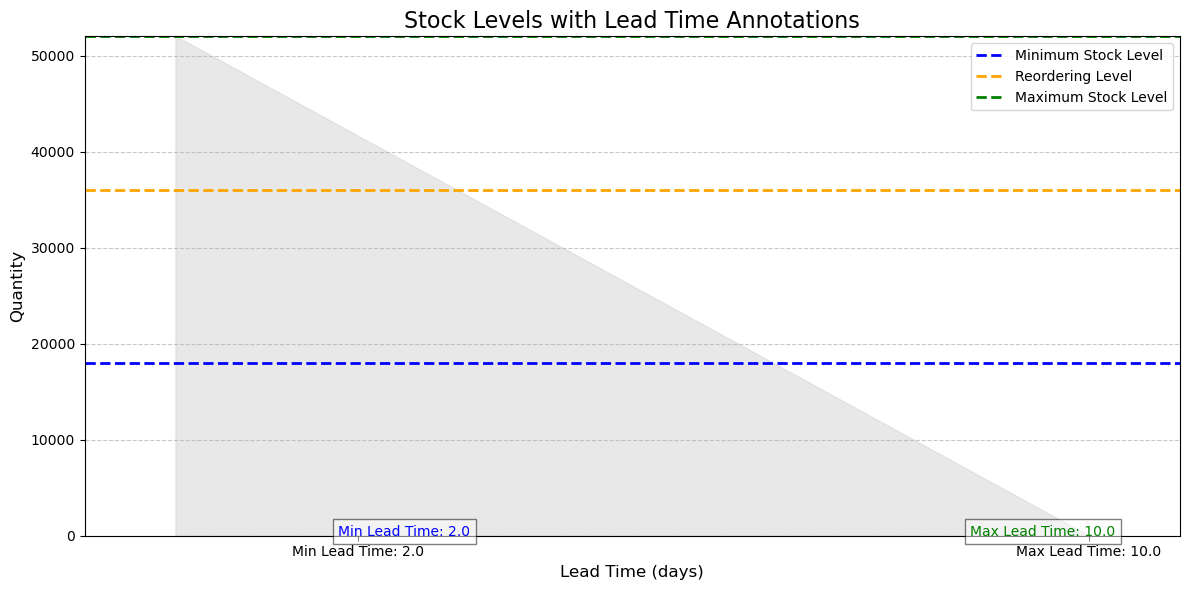

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_stock_levels(min_consumption, max_consumption, min_lead_time, max_lead_time):
    # Calculate Average Consumption and Average Lead Time
    avg_consumption = (min_consumption + max_consumption) / 2
    avg_lead_time = (min_lead_time + max_lead_time) / 2

    # Calculate Reorder Quantity
    reorder_quantity = avg_consumption * avg_lead_time

    # Calculate Reordering Level
    reorder_level = reorder_quantity + (avg_consumption * avg_lead_time)

    # Calculate Minimum Stock Level
    min_stock_level = reorder_level - (avg_consumption * avg_lead_time)

    # Calculate Maximum Stock Level
    max_stock_level = reorder_level + reorder_quantity - (min_consumption * min_lead_time)

    return {
        "Minimum Stock Level": min_stock_level,
        "Reordering Level": reorder_level,
        "Maximum Stock Level": max_stock_level,
        "Reorder Quantity": reorder_quantity
    }

# Input values
min_consumption = float(input("Enter Minimum Consumption: "))
max_consumption = float(input("Enter Maximum Consumption: "))
min_lead_time = float(input("Enter Minimum Lead Time (in days): "))
max_lead_time = float(input("Enter Maximum Lead Time (in days): "))

# Calculate stock levels
stock_levels = calculate_stock_levels(min_consumption, max_consumption, min_lead_time, max_lead_time)

# Create a Pandas DataFrame
df = pd.DataFrame(stock_levels, index=[0])

# Print the DataFrame
print(df)

# Plot the stock levels with horizontal lines
plt.figure(figsize=(12, 6))

# Horizontal lines for stock levels with colors
colors = ['blue', 'orange', 'green']
for (level, value), color in zip(stock_levels.items(), colors):
    plt.axhline(y=value, label=level, linestyle='--', color=color, linewidth=2)

# Setting x-axis limits and ticks for lead times
plt.xlim(-1, max_lead_time + 1)
plt.xticks([min_lead_time, max_lead_time], [f'Min Lead Time: {min_lead_time}', f'Max Lead Time: {max_lead_time}'])

# Adding annotations for Minimum and Maximum Lead Time
plt.text(min_lead_time + 0.5, min_lead_time, f'Min Lead Time: {min_lead_time}', 
         horizontalalignment='center', color='blue', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(max_lead_time - 0.5, max_lead_time, f'Max Lead Time: {max_lead_time}', 
         horizontalalignment='center', color='green', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Draw the triangle: right angle at (0, 0), base along x-axis to (max_lead_time, 0), apex at (0, max_stock_level)
triangle_x = [0, max_lead_time, 0]
triangle_y = [0, 0, stock_levels["Maximum Stock Level"]]
plt.fill(triangle_x, triangle_y, color='lightgray', alpha=0.5)

# Adding titles and labels
plt.title('Stock Levels with Lead Time Annotations', fontsize=16)
plt.ylabel('Quantity', fontsize=12)
plt.xlabel('Lead Time (days)', fontsize=12)
plt.ylim(0, max(stock_levels.values()) + 5)  # Adjust y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
